# Lecture 5: Model Evaluation, Training and Test Data

* How to split data into training and test sets
* How to train a model on the training data
* How to evaluate a model on the test data

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

We again use the well-known Iris data set with three classes:

      Iris-Setosa            Iris-Versicolour      Iris-Virginica
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg" alt="Iris-Setosa" style="width: 200px; display: inline; margin-top: 0"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" alt="Iris-Versicolour" style="width: 200px; display: inline; margin-top: 0"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris-Virginica" style="height: 200px; display: inline; margin-top: 0"/>

We can load this data by calling [`load_iris()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html):

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

## Splitting Data into Training and Test Sets

When we split data into training and test samples, we must be sure not to do so in a systematic way. For example, if the data is ordered temporally and we take the first 75% of observations, then the training and test data are systematically different with respect to time. All observations in the training data precede the test data.

To split data non-systematically (i.e., randomly) into training and test samples, we use the aptly named method [`train_test_split(X, y, train_size, random_state)`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split):
* `train_size`: how big the training portion will be (in percent)
* `random_state`: optional integer; the split will be the same every time you use the same `random_state`.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=284639)

`X_train` and `y_train` are our training data (70%) and `X_test` and `y_test` are our test data (30%):

In [4]:
print(f'   Train   Test   Total')
print(f'X: {X_train.shape[0]}   + {X_test.shape[0]}   = {X.shape[0]}')
print(f'y: {y_train.shape[0]}   + {y_test.shape[0]}   = {y.shape[0]}')

   Train   Test   Total
X: 105   + 45   = 150
y: 105   + 45   = 150


The train-test split can also be stratified if classes are represented unequally (unbalanced).

## Training a Model on Training Data

### 1. Choose a Model

We use a GNB model again:

In [5]:
from sklearn.naive_bayes import GaussianNB

### 2. Choose Hyperparameters

In [6]:
model = GaussianNB()

### 3. Arrange Data in Feature Matrix and Target Vector

Instead of `X` and `y`, we now use **`X_train`** and **`y_train`**:

In [7]:
X_train.shape

(105, 4)

In [8]:
y_train.shape

(105,)

### 4. Fit the Model to the Data

Instead of `X` and `y`, we now train the model on **`X_train`** and **`y_train`**:

In [9]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Evaluating a Model on Test Data

The point of splitting the data is to evaluate our model not on the data that it was trained, but on *unseen test data*. Thus, instead of `X`, we use **`X_test`** to compute the model score:

In [10]:
model.score(X_test, y_test)

0.9111111111111111

Let's compare this to the accuracy in the training data:

In [11]:
model.score(X_train, y_train)

0.9619047619047619

Indeed the accuracy in the training data is higher: the model (naturally) fits the training data better that the unseen test data.

We can also use `X_test` to create predictions for the test data, and compare them to the correct classes using a confusion matrix:

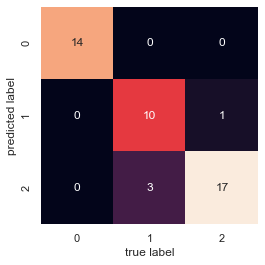

In [12]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

© 2023 Philipp Cornelius